In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"].astype(int)

X = np.array(X)
y = np.array(y)

# Normalize the data
X = X / 255.0

# Convert labels to one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (56000, 784)
Test set size: (14000, 784)


In [ ]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_sizes, output_size, learning_rate=0.01):
        np.random.seed(42)
        # Xavier initialization
        self.W1 = np.random.randn(input_size, hidden_sizes[0]) / np.sqrt(input_size)
        self.b1 = np.zeros((1, hidden_sizes[0]))
        self.W2 = np.random.randn(hidden_sizes[0], hidden_sizes[1]) / np.sqrt(hidden_sizes[0])
        self.b2 = np.zeros((1, hidden_sizes[1]))
        self.W3 = np.random.randn(hidden_sizes[1], output_size) / np.sqrt(hidden_sizes[1])
        self.b3 = np.zeros((1, output_size))
        self.learning_rate = learning_rate

    def softmax(self, z):
        exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
        return exp_z / exp_z.sum(axis=1, keepdims=True)

    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = np.maximum(0, self.Z1)  # ReLU activation
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = np.maximum(0, self.Z2)  # ReLU activation
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = self.softmax(self.Z3)  # Softmax activation
        return self.A3

    def cross_entropy_loss(self, y_true, y_pred):
        m = y_true.shape[0]
        log_likelihood = -np.log(y_pred[range(m), np.argmax(y_true, axis=1)])
        loss = np.sum(log_likelihood) / m
        return loss

    def sum_squared_residuals_loss(self, y_true, y_pred):
        return 0.5 * np.sum((y_true - y_pred) ** 2) / y_true.shape[0]

    def backward(self, X, y, output):
        m = X.shape[0]

        dZ3 = output - y
        dW3 = np.dot(self.A2.T, dZ3) / m
        db3 = np.sum(dZ3, axis=0, keepdims=True) / m
        dA2 = np.dot(dZ3, self.W3.T)

        dZ2 = dA2 * (self.Z2 > 0)
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        dA1 = np.dot(dZ2, self.W2.T)

        dZ1 = dA1 * (self.Z1 > 0)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W3 -= self.learning_rate * dW3
        self.b3 -= self.learning_rate * db3

    def accuracy(self, y_true, y_pred):
        predictions = np.argmax(y_pred, axis=1)
        labels = np.argmax(y_true, axis=1)
        return np.mean(predictions == labels)

    def train(self, X_train, y_train, epochs=1000):
        for epoch in range(epochs):
            output = self.forward(X_train)
            self.backward(X_train, y_train, output)

            cross_entropy_loss = self.cross_entropy_loss(y_train, output)
            ssr_loss = self.sum_squared_residuals_loss(y_train, output)
            acc = self.accuracy(y_train, output)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Cross-Entropy Loss: {cross_entropy_loss}, SSR Loss: {ssr_loss}, Accuracy: {acc}")
    def visualize_predictions(self, X_test, y_test, num_samples=10):
        """
        Visualize a few samples from the test dataset along with the model's predictions.

        Parameters:
        - X_test: Test input data
        - y_test: True labels for test data
        - num_samples: Number of samples to visualize
        """
        # Predict the labels
        y_pred = self.forward(X_test)
        y_pred_labels = np.argmax(y_pred, axis=1)
        y_true_labels = np.argmax(y_test, axis=1)

        # Randomly select samples to visualize
        indices = np.random.choice(X_test.shape[0], num_samples, replace=False)

        plt.figure(figsize=(15, 5))
        for i, index in enumerate(indices):
            plt.subplot(2, num_samples // 2, i + 1)
            plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
            plt.title(f'True: {y_true_labels[index]}\nPred: {y_pred_labels[index]}')
            plt.axis('off')

        plt.show()



In [ ]:
# Initialize the neural network with a smaller learning rate
nn = NeuralNetwork(input_size=784, hidden_sizes=[32, 32], output_size=10, learning_rate=0.01)

# Train the neural network
nn.train(X_train, y_train, epochs=1000)

# Evaluate on the test set
test_output = nn.forward(X_test)
test_accuracy = nn.accuracy(y_test, test_output)
print(f"Test Accuracy: {test_accuracy}")

Epoch 0, Cross-Entropy Loss: 2.3429773641229072, SSR Loss: 0.4537995987598951, Accuracy: 0.07405357142857143
Epoch 100, Cross-Entropy Loss: 2.07748152646247, SSR Loss: 0.4219825075361126, Accuracy: 0.37810714285714286
Epoch 200, Cross-Entropy Loss: 1.7323332098456725, SSR Loss: 0.36848619436757296, Accuracy: 0.493
Epoch 300, Cross-Entropy Loss: 1.3571361136325242, SSR Loss: 0.30242777545716004, Accuracy: 0.6379285714285714
Epoch 400, Cross-Entropy Loss: 1.0562721665518904, SSR Loss: 0.2413717533303831, Accuracy: 0.7444642857142857
Epoch 500, Cross-Entropy Loss: 0.8677114834211727, SSR Loss: 0.19919756444166853, Accuracy: 0.7783214285714286
Epoch 600, Cross-Entropy Loss: 0.7473361006832275, SSR Loss: 0.17114346910783404, Accuracy: 0.8019642857142857
Epoch 700, Cross-Entropy Loss: 0.665963624755651, SSR Loss: 0.1519965992047637, Accuracy: 0.8201607142857142
Epoch 800, Cross-Entropy Loss: 0.6072933462786502, SSR Loss: 0.1380890439767003, Accuracy: 0.8347321428571428
Epoch 900, Cross-Entro

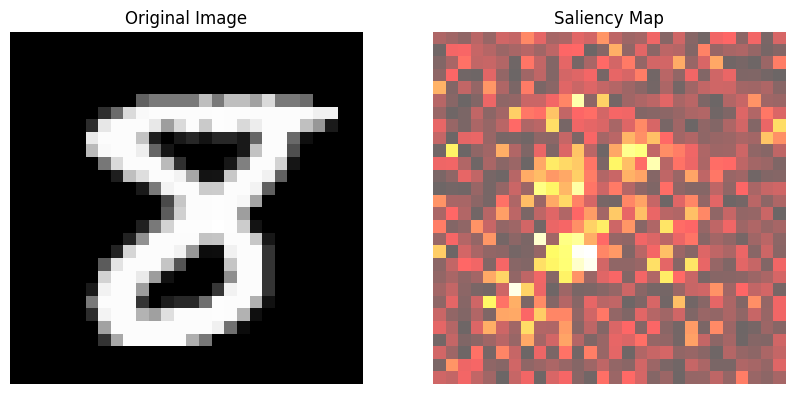

In [ ]:
def saliency_map(nn, X, target_class_index):
    # Generate a saliency map for a specific class in the neural network.
    output = nn.forward(X)
    target = np.zeros_like(output)
    target[0, target_class_index] = 1  # One-hot for the target class
    dZ3 = output - target  # Gradient of the loss with respect to output
    dA2 = np.dot(dZ3, nn.W3.T)  # Gradient to A2
    dZ2 = dA2 * (nn.Z2 > 0)  # ReLU derivative
    dA1 = np.dot(dZ2, nn.W2.T)  # Gradient to A1
    dZ1 = dA1 * (nn.Z1 > 0)  # ReLU derivative
    saliency = np.dot(dZ1, nn.W1.T)  # Compute saliency
    return np.abs(saliency)

def visualize_saliency(saliency, original_image):
    plt.figure(figsize=(10, 5))

    # Plot original image
    plt.subplot(1, 2, 1)
    plt.imshow(original_image.reshape(28, 28), cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    # Plot saliency map
    plt.subplot(1, 2, 2)
    plt.imshow(saliency.reshape(28, 28), cmap='hot', alpha=0.6)  # Heatmap
    plt.title('Saliency Map')
    plt.axis('off')

    plt.show()

# Assuming you have trained your network and have X_test and y_test ready
# Example usage:
target_class_index = 3  # Replace with your desired class index
saliency = saliency_map(nn, X_test[0:1], target_class_index)
visualize_saliency(saliency, X_test[0])

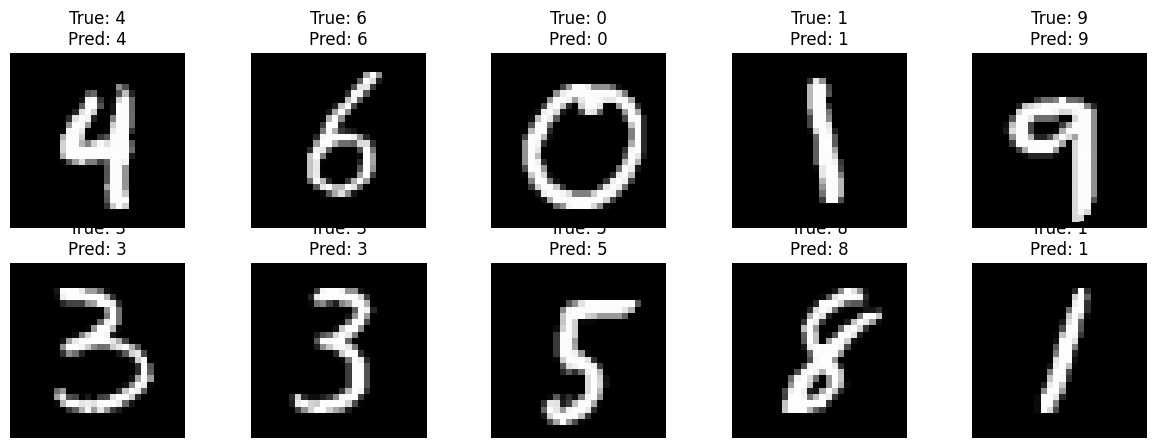

In [ ]:
# Visualize predictions on test data
nn.visualize_predictions(X_test, y_test, num_samples=10)

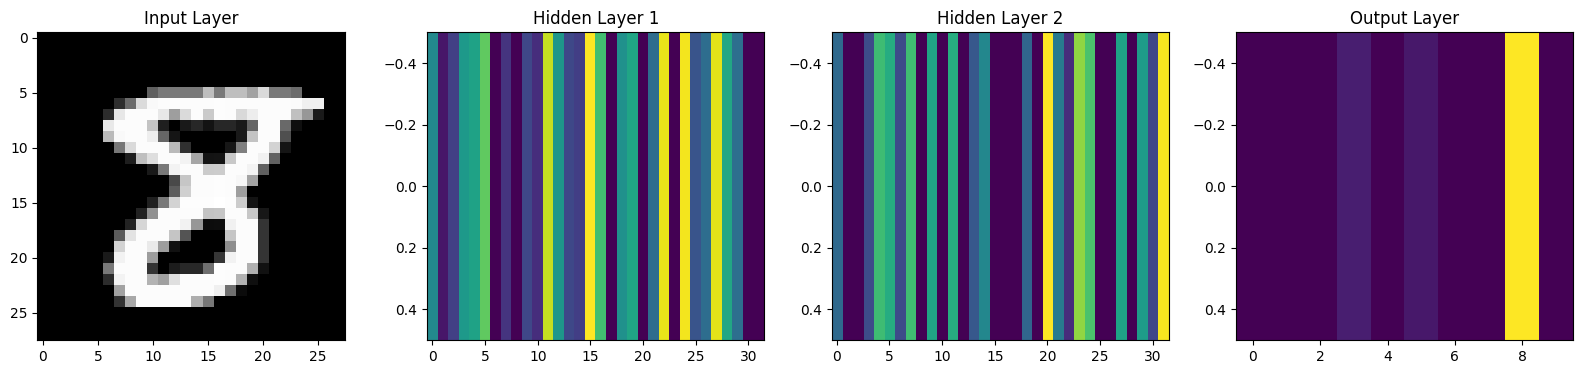

In [ ]:
def visualize_activations(nn, X):
    activations = [X]
    Z1 = np.dot(X, nn.W1) + nn.b1
    A1 = np.maximum(0, Z1)
    activations.append(A1)
    Z2 = np.dot(A1, nn.W2) + nn.b2
    A2 = np.maximum(0, Z2)
    activations.append(A2)
    Z3 = np.dot(A2, nn.W3) + nn.b3
    A3 = nn.softmax(Z3)
    activations.append(A3)
    return activations

# Visualize activations for a sample image
sample_image = X_test[0].reshape(1, -1)
activations = visualize_activations(nn, sample_image)

# Plot the activations
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
layer_names = ['Input Layer', 'Hidden Layer 1', 'Hidden Layer 2', 'Output Layer']

for i, (activation, name) in enumerate(zip(activations, layer_names)):
    if i == 0:
        axes[i].imshow(activation.reshape(28, 28), cmap='gray')
    else:
        axes[i].imshow(activation, aspect='auto')
    axes[i].set_title(name)
plt.show()

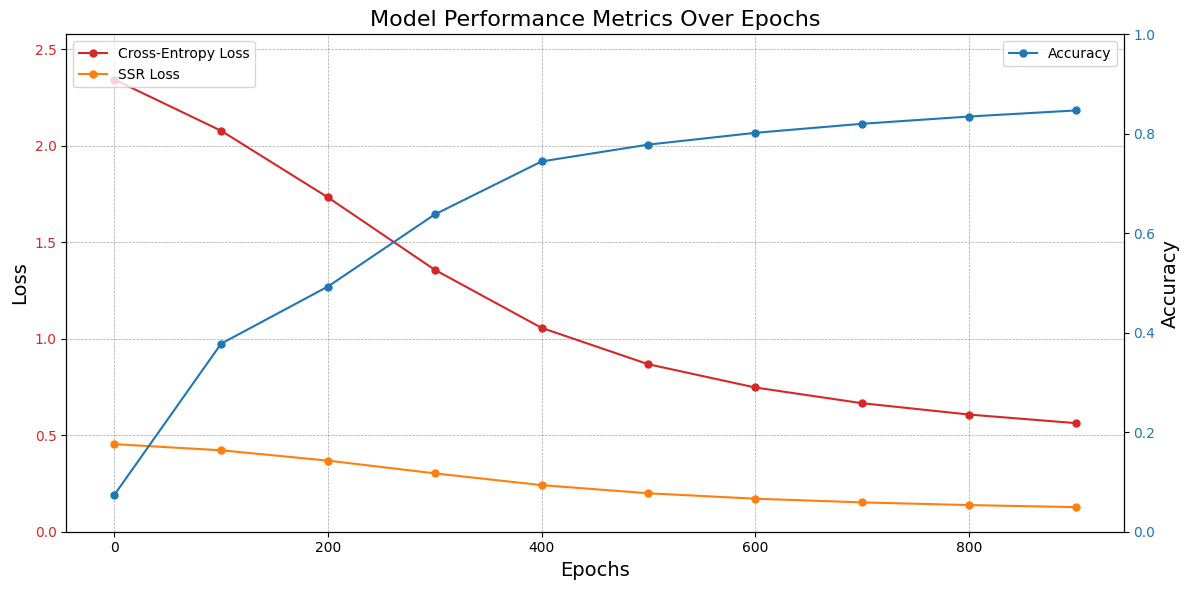

In [ ]:


def plot_model_performance(metrics_dict):
    # Extract data from the input dictionary
    epochs = list(metrics_dict.keys())
    cross_entropy_loss = [data['Cross-Entropy Loss'] for data in metrics_dict.values()]
    ssr_loss = [data['SSR Loss'] for data in metrics_dict.values()]
    accuracy = [data['Accuracy'] for data in metrics_dict.values()]

    # Create a figure and axis
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plotting Cross-Entropy Loss and SSR Loss
    ax1.set_xlabel('Epochs', fontsize=14)
    ax1.set_ylabel('Loss', fontsize=14)
    ax1.plot(epochs, cross_entropy_loss, label='Cross-Entropy Loss', color='tab:red', marker='o', markersize=5, linewidth=1.5)
    ax1.plot(epochs, ssr_loss, label='SSR Loss', color='tab:orange', marker='o', markersize=5, linewidth=1.5)
    ax1.tick_params(axis='y', labelcolor='tab:red')
    ax1.set_ylim(0, max(cross_entropy_loss[0], ssr_loss[0]) * 1.1)
    ax1.legend(loc='upper left')

    # Create a second y-axis to plot Accuracy
    ax2 = ax1.twinx()
    ax2.set_ylabel('Accuracy', fontsize=14)
    ax2.plot(epochs, accuracy, label='Accuracy', color='tab:blue', marker='o', markersize=5, linewidth=1.5)
    ax2.tick_params(axis='y', labelcolor='tab:blue')
    ax2.set_ylim(0, 1)  # Accuracy ranges from 0 to 1
    ax2.legend(loc='upper right')

    # Adding title and gridlines
    plt.title('Model Performance Metrics Over Epochs', fontsize=16)
    fig.tight_layout()  # Adjust layout to prevent clipping of ylabel
    ax1.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

    # Show the plot
    plt.show()

# Example dictionary with your model performance metrics
metrics = {
    0: {'Cross-Entropy Loss': 2.3429773641229072, 'SSR Loss': 0.4537995987598951, 'Accuracy': 0.07405357142857143},
    100: {'Cross-Entropy Loss': 2.07748152646247, 'SSR Loss': 0.4219825075361126, 'Accuracy': 0.37810714285714286},
    200: {'Cross-Entropy Loss': 1.7323332098456725, 'SSR Loss': 0.36848619436757296, 'Accuracy': 0.493},
    300: {'Cross-Entropy Loss': 1.3571361136325242, 'SSR Loss': 0.30242777545716004, 'Accuracy': 0.6379285714285714},
    400: {'Cross-Entropy Loss': 1.0562721665518904, 'SSR Loss': 0.2413717533303831, 'Accuracy': 0.7444642857142857},
    500: {'Cross-Entropy Loss': 0.8677114834211727, 'SSR Loss': 0.19919756444166853, 'Accuracy': 0.7783214285714286},
    600: {'Cross-Entropy Loss': 0.7473361006832275, 'SSR Loss': 0.17114346910783404, 'Accuracy': 0.8019642857142857},
    700: {'Cross-Entropy Loss': 0.665963624755651, 'SSR Loss': 0.1519965992047637, 'Accuracy': 0.8201607142857142},
    800: {'Cross-Entropy Loss': 0.6072933462786502, 'SSR Loss': 0.1380890439767003, 'Accuracy': 0.8347321428571428},
    900: {'Cross-Entropy Loss': 0.5626715927860536, 'SSR Loss': 0.12743643856404233, 'Accuracy': 0.8469642857142857},
}

# Call the function with the metrics dictionary
plot_model_performance(metrics)


In [ ]:
# Define network architecture
input_size = 784
hidden_sizes = [128, 64]
output_size = 10
learning_rate = 0.01

# Create the neural network
nn = NeuralNetwork(input_size, hidden_sizes, output_size, learning_rate)

# Train the network
nn.train(X_train, y_train, epochs=1000)

# Visualize predictions
nn.visualize_predictions(X_test, y_test, num_samples=10)

# Saliency Map for the first test sample
saliency = nn.saliency_map(nn, X_test[0].reshape(1, -1), target_class_index=5)
nn.visualize_saliency(saliency, X_test[0])